## Introduction

### To make the next marketing campaign better, the financial institution should look at what happened in the last campaign. By studying the data, they can find patterns and important information. This will help them make smart decisions and create effective strategies for the future. Understanding what customers like is very important. They should also try different things and see what works best. By using the data and these findings, the financial institution can make their marketing campaigns more successful.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv("bank.csv")

## 1-EXPLOROTARY DATA ANALYSIS (EDA)

## A- DATA EXPLORATION


In [51]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [52]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


<Axes: >

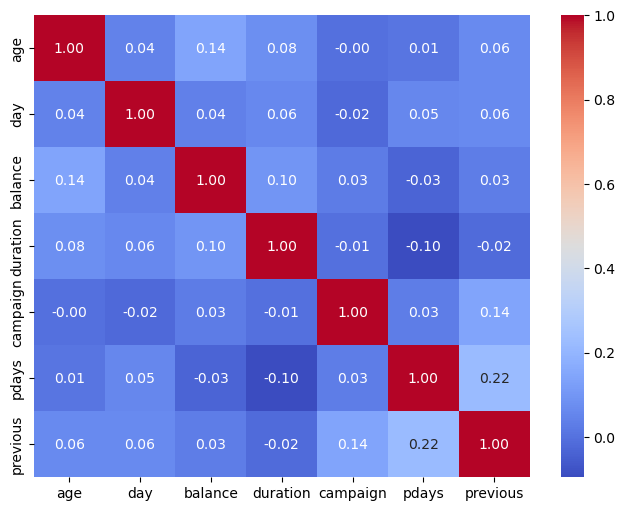

In [53]:
selected_columns = ['age','day', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Creating a new DataFrame containing only the selected columns
selected_df = df[selected_columns]

# Generating the correlation matrix
correlation_matrix = selected_df.corr()

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

we see that there is no important correlation between all numerical columns 




lets see more about the factors that influences the balance of the clients

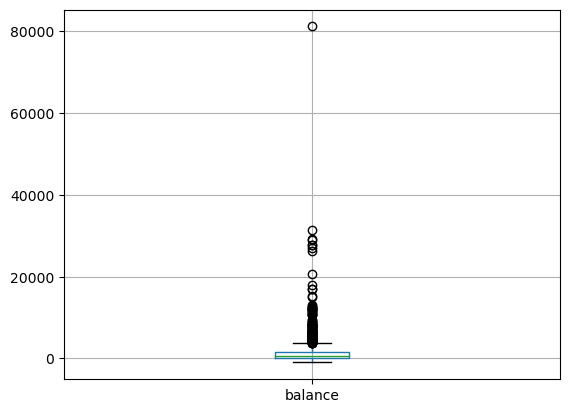

In [36]:
df.boxplot(column='balance')
plt.show()

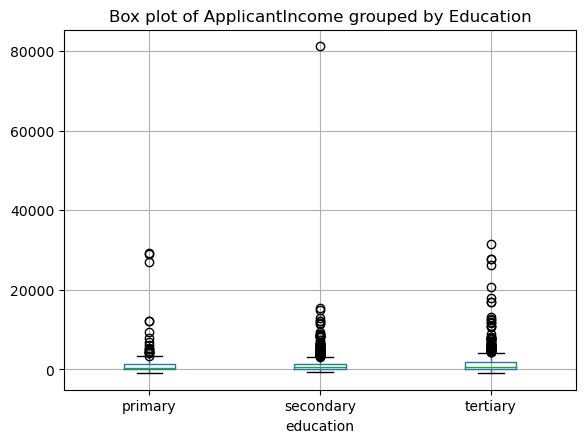

In [61]:
df.boxplot(column='balance', by='education')
plt.title('Box plot of ApplicantIncome grouped by Education')
plt.suptitle("")
plt.show()

The distribution across the population reveals varying education levels, resulting in outliers in all three categories. Notably, the tertiary category has the greatest number of outliers, a rational outcome considering individuals in this group have received the highest level of education among the three categories. 


let's see now the influence marital status on individual balance

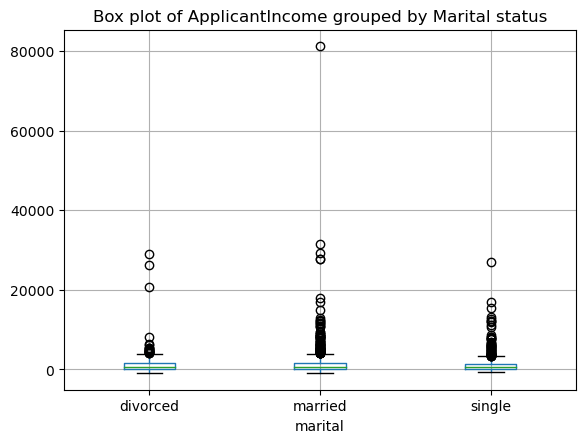

In [76]:
df.boxplot(column='balance', by='marital')
plt.title('Box plot of ApplicantIncome grouped by Marital status')
plt.suptitle("")
plt.show()

We observe that both single and married individuals exhibit a higher number of outliers, although with a slight advantage for the married ones. In contrast, the divorced category displays the fewest outliers. Additionally, there appears to be no significant distinction in the mean balance among all three status groups.

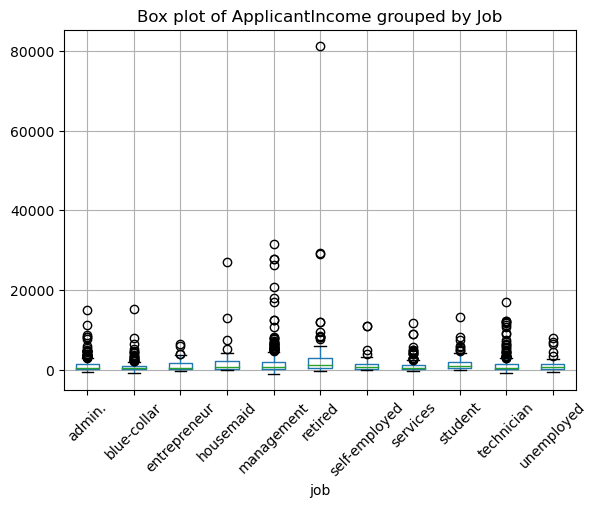

In [77]:

df.boxplot(column='balance', by='job')
plt.title('Box plot of ApplicantIncome grouped by Job')
plt.suptitle("")
plt.xticks(rotation=45)
plt.show()

The distribution of balances differs across various job categories. Notably, the management sector exhibits the highest earnings, resulting in individuals within this sector recording the highest balance numbers.

 
 for Categorical Attributes :

In [42]:
df['marital'].value_counts()



marital
married     1111
single       674
divorced     215
Name: count, dtype: int64

In [43]:
df['education'].value_counts()

education
secondary    995
tertiary     684
primary      217
Name: count, dtype: int64

In [46]:
df['poutcome'].value_counts()

poutcome
failure    955
success    444
other      147
Name: count, dtype: int64

In [120]:
df['job'].value_counts()

job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: count, dtype: int64

let's discuss now the percentage of clients subscription based on different attributes

In [95]:
pivot_table = df.pivot_table(values='subscribed',
                                index='education',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())

In [96]:
print(pivot_table)

           subscribed
education            
primary      0.387097
secondary    0.453266
tertiary     0.578947


In [97]:
pivot_table = df.pivot_table(values='subscribed',
                                index='marital',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())

In [98]:
print(pivot_table)


          subscribed
marital             
divorced    0.437209
married     0.450945
single      0.600890


In [100]:
pivot_table = df.pivot_table(values='subscribed',
                                index='job',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())

In [101]:
print(pivot_table)


               subscribed
job                      
admin.           0.526316
blue-collar      0.258389
entrepreneur     0.333333
housemaid        0.571429
management       0.544469
retired          0.839506
self-employed    0.546875
services         0.303030
student          0.906250
technician       0.413793
unemployed       0.695652


if we see behind all these numbers we can detect that majority of students (90%) Subscribe as a result of the compaign 

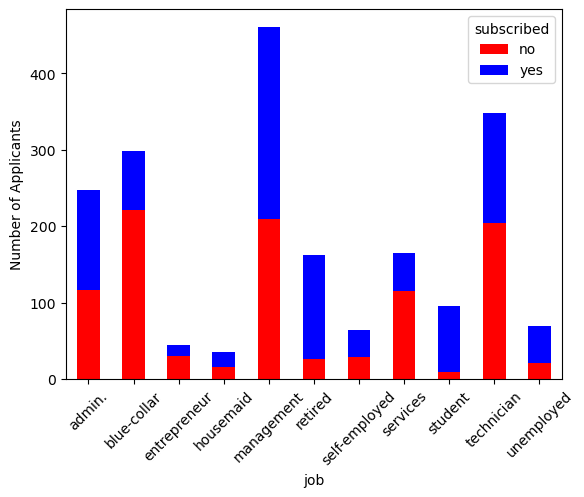

In [118]:
crosstab = pd.crosstab(df['job'], df['subscribed'])
crosstab.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.show()

students and retired individus are the ones with the most chance to subscribe, maybe this related to social factors such as low financial and familial responsibilities

let's add the marital status to type of job and see the results

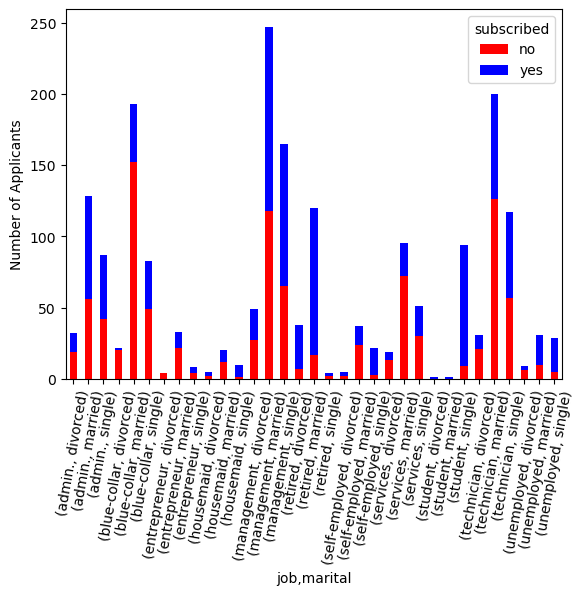

In [119]:
crosstab = pd.crosstab([df['job'], df['marital']], df['subscribed'])
crosstab.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.xticks(rotation=80)
plt.show()

we can conclude form this representation that single status enhance the Probability to subscribe  

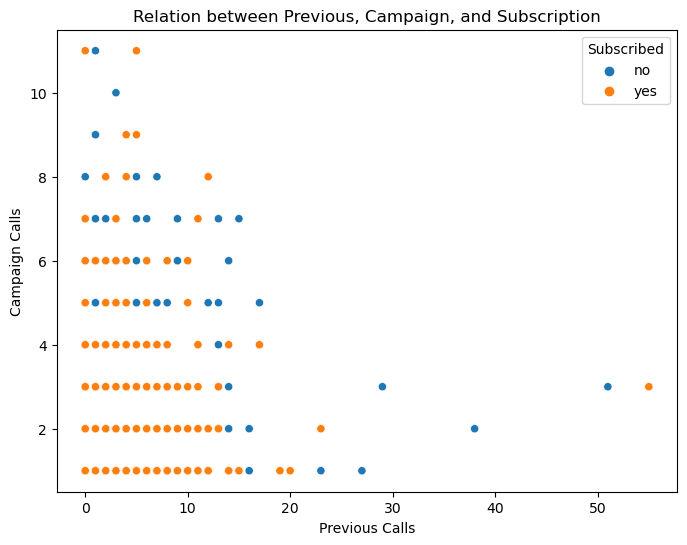

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='previous', y='campaign', hue='subscribed', data=df)
plt.title('Relation between Previous, Campaign, and Subscription')
plt.xlabel('Previous Calls')
plt.ylabel('Campaign Calls')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

In [123]:
subscribed_stats = df.groupby('subscribed')[['previous', 'campaign']].mean()
print(subscribed_stats)

            previous  campaign
subscribed                    
no             2.362     1.957
yes            2.761     1.862


we can conclude that the number of calls doesn't effect the client decision to subscribe in fact on average of clients subscribe from the first calls 

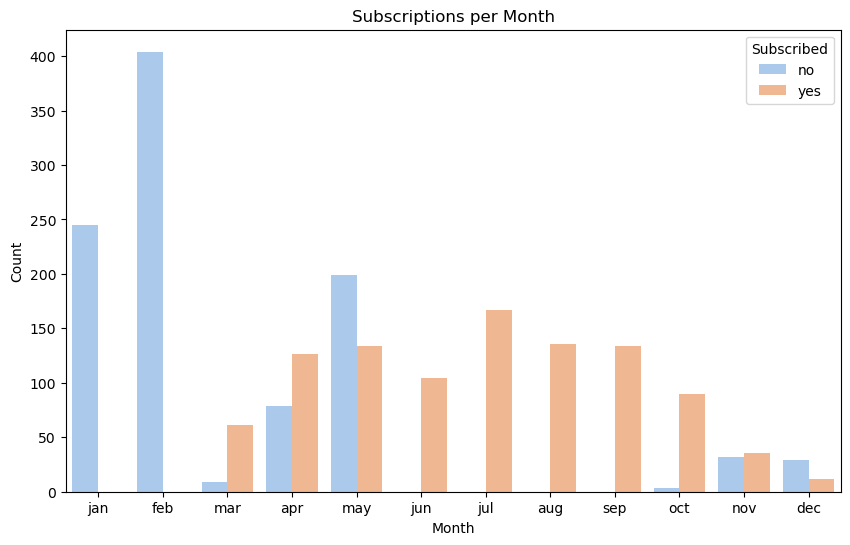

In [137]:
# Count plot for 'month' column with 'subscribed'
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='subscribed', data=df, palette='pastel', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Subscriptions per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right')
plt.show()


In [138]:
# Cross-tabulation to examine relationship
cross_tab_month = pd.crosstab(index=df['month'], columns=df['subscribed'], normalize='index')
print(cross_tab_month)

subscribed        no       yes
month                         
apr         0.385366  0.614634
aug         0.000000  1.000000
dec         0.707317  0.292683
feb         1.000000  0.000000
jan         1.000000  0.000000
jul         0.000000  1.000000
jun         0.000000  1.000000
mar         0.128571  0.871429
may         0.597598  0.402402
nov         0.470588  0.529412
oct         0.032258  0.967742
sep         0.000000  1.000000
